**Problem Description**:
In this project, your task is to identify major customer segments on a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Data Description**

**Attribute Information**:
InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

#**Let's Begin !**

##**Importingn Libraries & dataset-**

In [ ]:
# Importing common libraries
import numpy as np #for handling arrays
import pandas as pd #for data manipulation, read_excel
from numpy import math

%matplotlib inline
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns; sns.set()
import seaborn as sns #for better visualizations
from scipy import stats
from datetime import datetime
from pylab import rcParams
import datetime as dt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the dataset
df=pd.read_csv('/content/drive/MyDrive/Online Retail.csv')

##**Data Inspection-**


In [ ]:
# checking the data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [ ]:
# checking for null values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<Axes: >

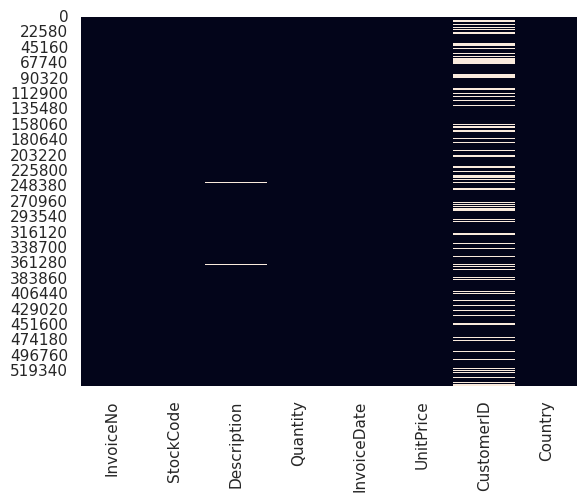

In [ ]:
# checking Null value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
# Total null values of CustomerID
df['CustomerID'].isnull().sum()

135080

In [ ]:
# Total null values of Description column
df['Description'].isnull().sum()

1454

In [ ]:
# Columns and data types
print("Columns and data types")
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


We have 4 object type, 1 int, 2 float, 1 datetime feature.

In [ ]:
#column names
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# figuring data types
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')

In [ ]:
# categorical columns
categorical_columns=list(df.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')

In [ ]:
# find unique values of categorical column
def unique_name_no(col):
  print(df[col].unique())
  print(df[col].nunique())


for i in categorical_columns:
  print(i.upper())
  unique_name_no(i)

INVOICENO
['536365' '536366' '536367' ... '581585' '581586' '581587']
25900
STOCKCODE
['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
4070
DESCRIPTION
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
4223
INVOICEDATE
['12/1/10 8:26' '12/1/10 8:28' '12/1/10 8:34' ... '12/9/11 12:31'
 '12/9/11 12:49' '12/9/11 12:50']
23260
COUNTRY
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']
38


In [ ]:
# duplicate
len(df[df.duplicated()])

5268

In [ ]:
#duplicate records
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/10 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/10 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/10 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/10 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/10 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/11 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/11 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/11 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/11 11:34,2.10,14446.0,United Kingdom


##**Data cleaning & preprocessing -**

In [ ]:
# removing duplicates
df = df.drop_duplicates()

In [ ]:
# again checking for duplicates
df.duplicated().sum()

0

In [ ]:
#checking null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

There are 541909 rows and 8 columns in above dataset.

Above dataset has missing value on Description & CustomerID.

There are 5268 duplicate values.

**Missing Value Imputation**

In [ ]:
#dropping missing values
df.dropna(inplace=True)

In [ ]:
#checking null values again
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#records remaining after removing null values
df.shape

(401604, 8)

In [ ]:
#checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [ ]:
#treatment of InvoiceNo
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

we have to drop some InvoiceNo which are starts with 'C' because 'C', it indicates a cancellation

In [ ]:
# removing InvoiceNo which contains C
df=df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
#rows and columns
df.shape

(392732, 8)

Now after treatment of Dataset, We have 392732 rows and 8 columns.



In [ ]:
#checking distribution
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


There are no negative values in the Quantity and UnitPrice column now.

But we can still see a minimum value of 0 in the UnitPrice column which cannot be real as a store cannot sell items for free.

We will investigate this column and remove those records.

In [ ]:
# check the columns having zero unit price
df[df['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/10 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/10 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/10 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/11 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/11 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/11 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/11 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/11 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/11 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/11 14:42,0.0,14410.0,United Kingdom


There are few records with zero values in UnitPrice which cannot be true so we will drop these records.

In [ ]:
# only consider UnitPrice greater than zero
df = df[df['UnitPrice'] > 0]

# check description of UnitPrice after dropping
df['UnitPrice'].describe()

count    392692.000000
mean          3.125914
std          22.241836
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

## **Feature Engineering -**

Convert InvoiceDate columns into date time format


In [ ]:
#extracting Invoice Date
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m/%d/%y %H:%M")

Create some new features from Invoicedate like hours, year, month_num, day_num

In [ ]:
# Create some new features from Invoicedate like hours,year,month_num,day_num
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

Create a new features TotalAmount from product of Quantity and Unitprice

In [ ]:
#creating new feature (TotalAmount)
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [ ]:
#getting Day as feature
df['Day']=df['InvoiceDate'].dt.day_name()

In [ ]:
# adding month name feature from Invoice Date feature
df['Month']=df['InvoiceDate'].dt.month_name()

In [ ]:
#checking changes
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,TotalAmount,Day,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,15.30,Wednesday,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,20.34,Wednesday,December


##**Exploratory data analysis**

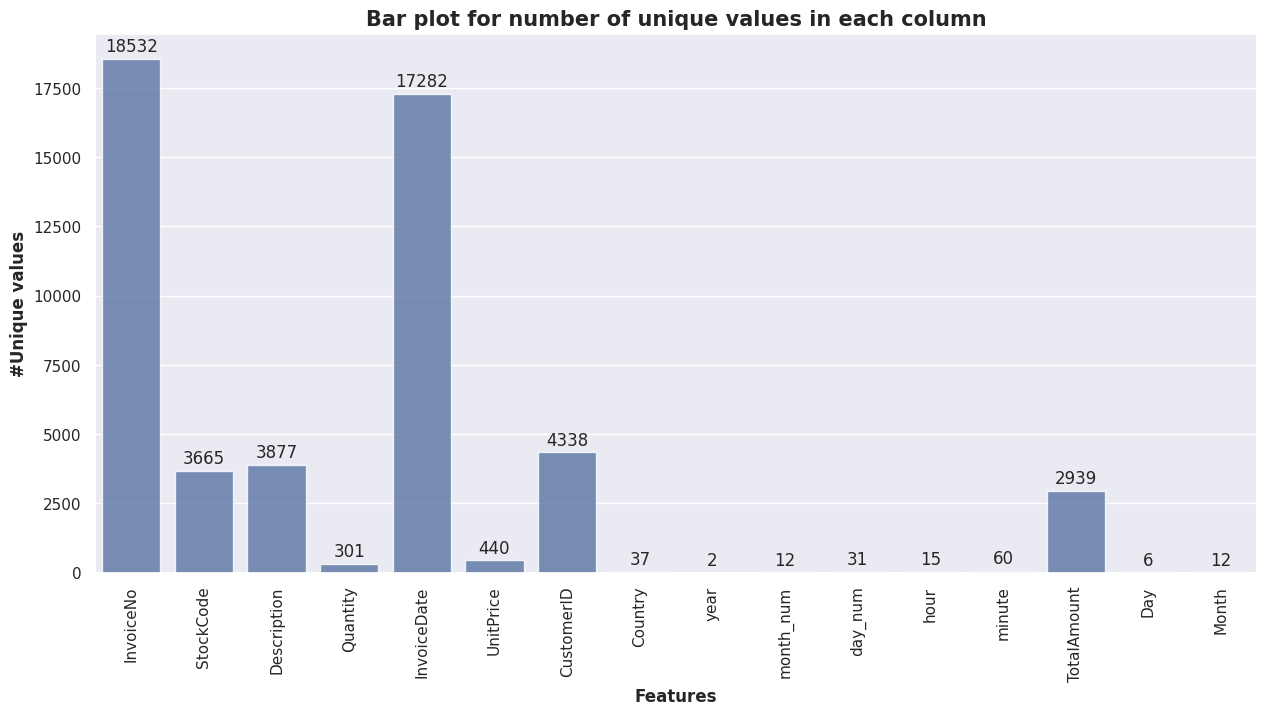

In [ ]:
#Counting unique value of features
unique_df=pd.DataFrame()
unique_df['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
unique_df['Uniques']=unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

Higher no. of Invoice No is justificable here as it represents no. of customers.

In [ ]:
# Calculating Top product based on maximum selling
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Product_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
Description_df.head()

,Product_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389


In [ ]:
#least Selling products
Description_df.tail()

,Product_Name,Count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


<Axes: title={'center': "Top 5 Product's"}, xlabel='Product_Name', ylabel='Count'>

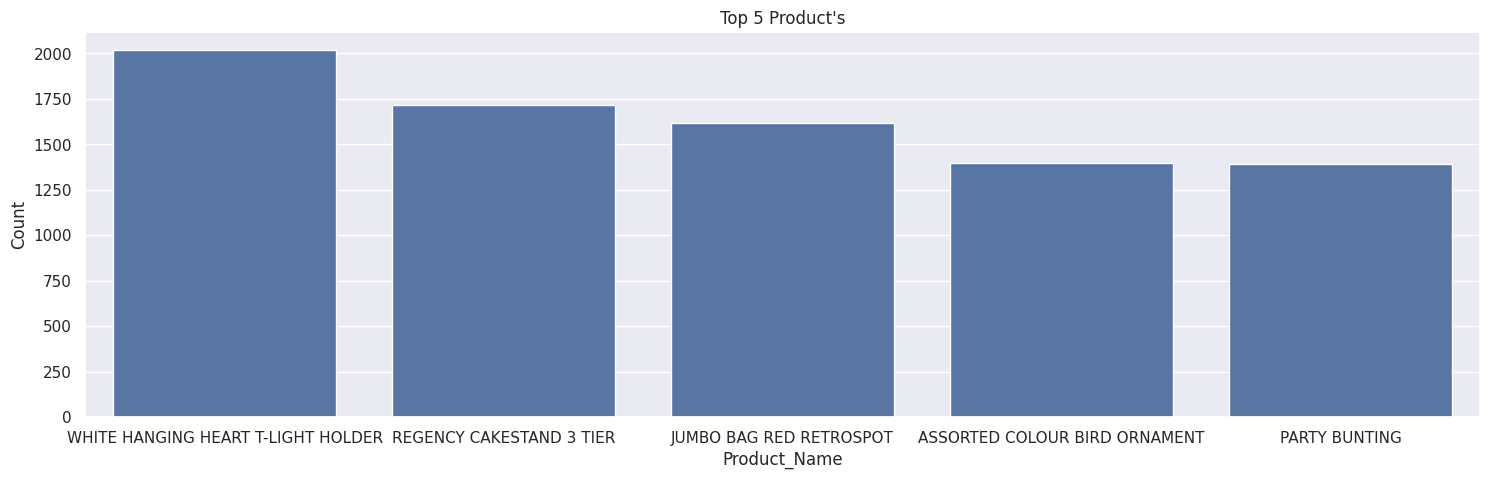

In [ ]:
#visualization Top product
plt.figure(figsize=(18,5))
plt.title("Top 5 Product's")
sns.barplot(x='Product_Name',y='Count',data=Description_df[:5])

Top product based on maximum selling are :

1.WHITE HANGING HEART T-LIGHT HOLDER,

2.REGENCY CAKESTAND 3 TIER

3.JUMBO BAG RED RETROSPOT

4.PARTY BUNTING

5.LUNCH BAG RED RETROSPOT

<Axes: title={'center': "Bottom 5 product's"}, xlabel='Product_Name', ylabel='Count'>

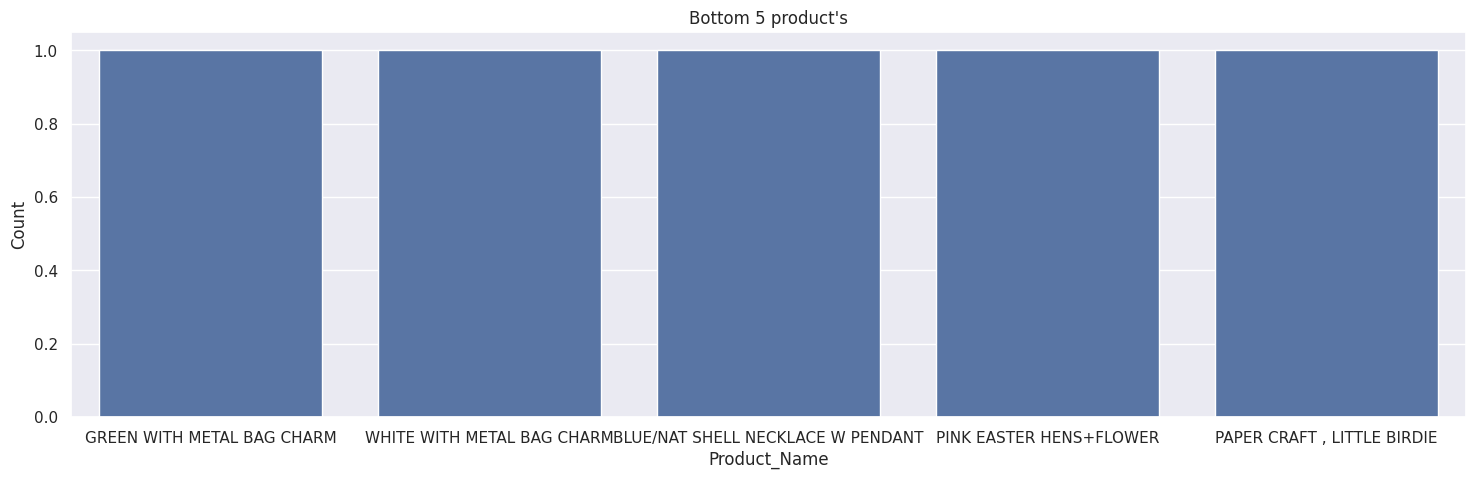

In [ ]:
#visualization of tail of description name
plt.figure(figsize=(18,5))
plt.title("Bottom 5 product's")
sns.barplot(x='Product_Name',y='Count',data=Description_df[-5:])

Bottom 5 Product based on the selling are:

1.LIGHT decoration battery operated

2.Water damaged

3.Throw away

4.Re dotcom quick fix.

5.Birthday banner type

In [ ]:
#count of stockcode_name as higher count comes first
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
StockCode_df.head()

,StockCode_Name,Count
0,85123A,2023
1,22423,1713
2,85099B,1615
3,84879,1395
4,47566,1389


In [ ]:
#count of stockcode from last
StockCode_df.tail()

,StockCode_Name,Count
3660,90059A,1
3661,20678,1
3662,90059D,1
3663,90168,1
3664,23843,1


<Axes: title={'center': 'Top 5 Stock Name'}, xlabel='StockCode_Name', ylabel='Count'>

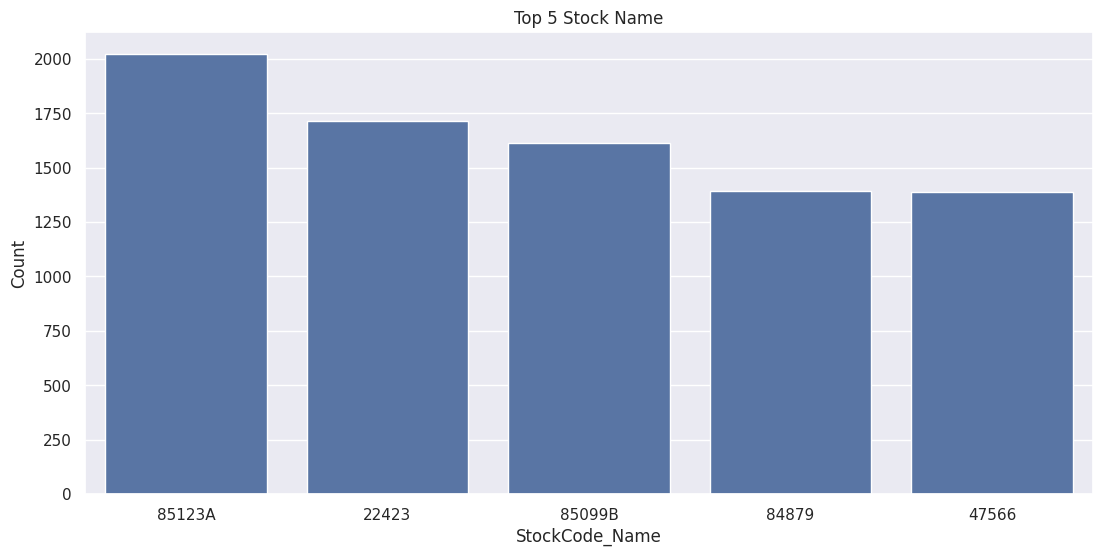

In [ ]:
#visualization of count of stock name
plt.figure(figsize=(13,6))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])

Top 5 Stock name based on selling are :

1.85123A

2.22423

3.85099B

4.47566

5.20725

In [ ]:
# Counting unique value of country_name as higher count comes first
country_df=df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
country_df.head()

,Country_Name,Count
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


<Axes: title={'center': 'Top 5 Country based Numbers of  Customers'}, xlabel='Country_Name', ylabel='Count'>

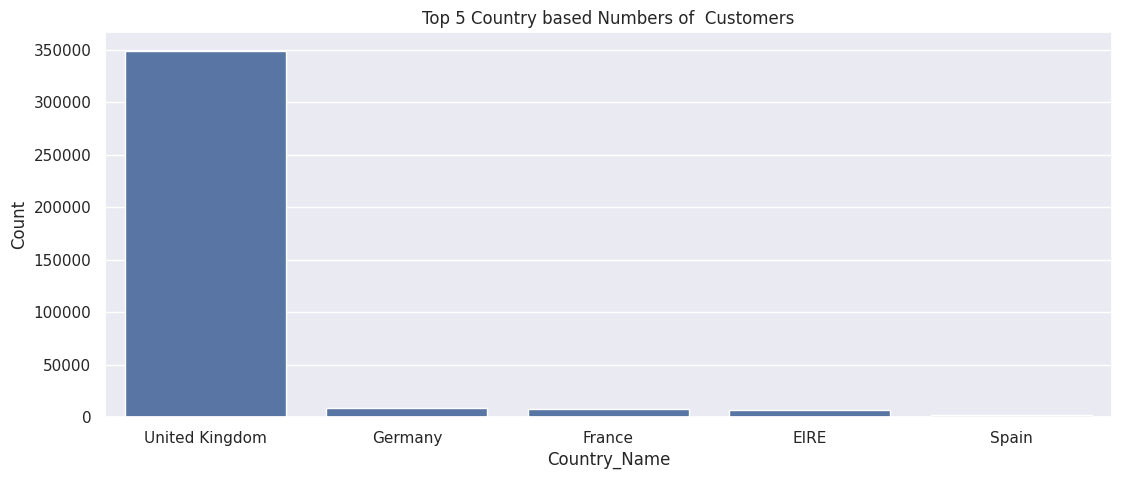

In [ ]:
#visualization Top 5 country's based on number of customers'
plt.figure(figsize=(13,5))
plt.title('Top 5 Country based Numbers of  Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[:5])

from this graph we can see most of customers are from UK.

In [ ]:
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


<Axes: title={'center': 'bottom 5 Country based least Numbers of  Customers'}, xlabel='Country_Name', ylabel='Count'>

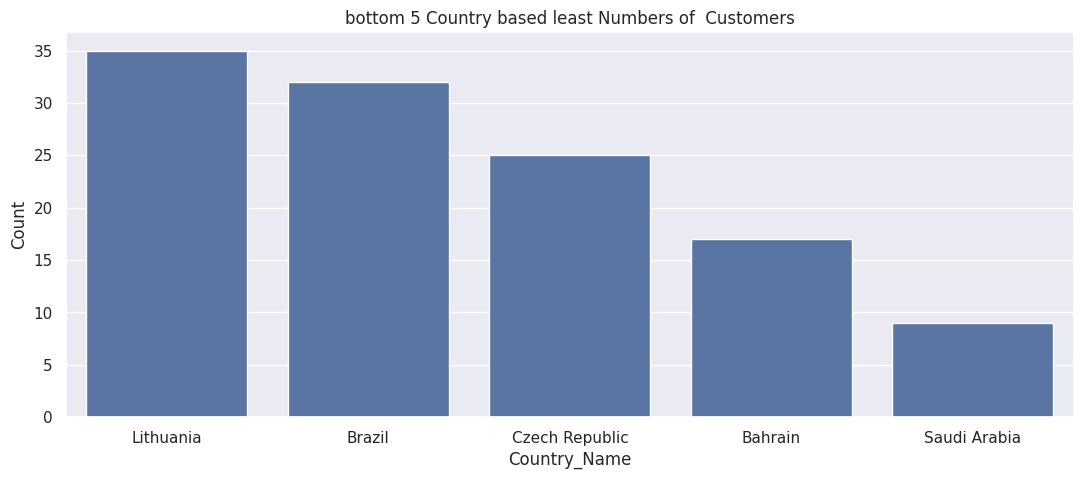

In [ ]:
#visualization of bottom 5 Country based on least Numbers of  Customers'
plt.figure(figsize=(13,5))
plt.title('bottom 5 Country based least Numbers of  Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain and Saudi Arabia

**Let us check the distribution of the numerical features:**

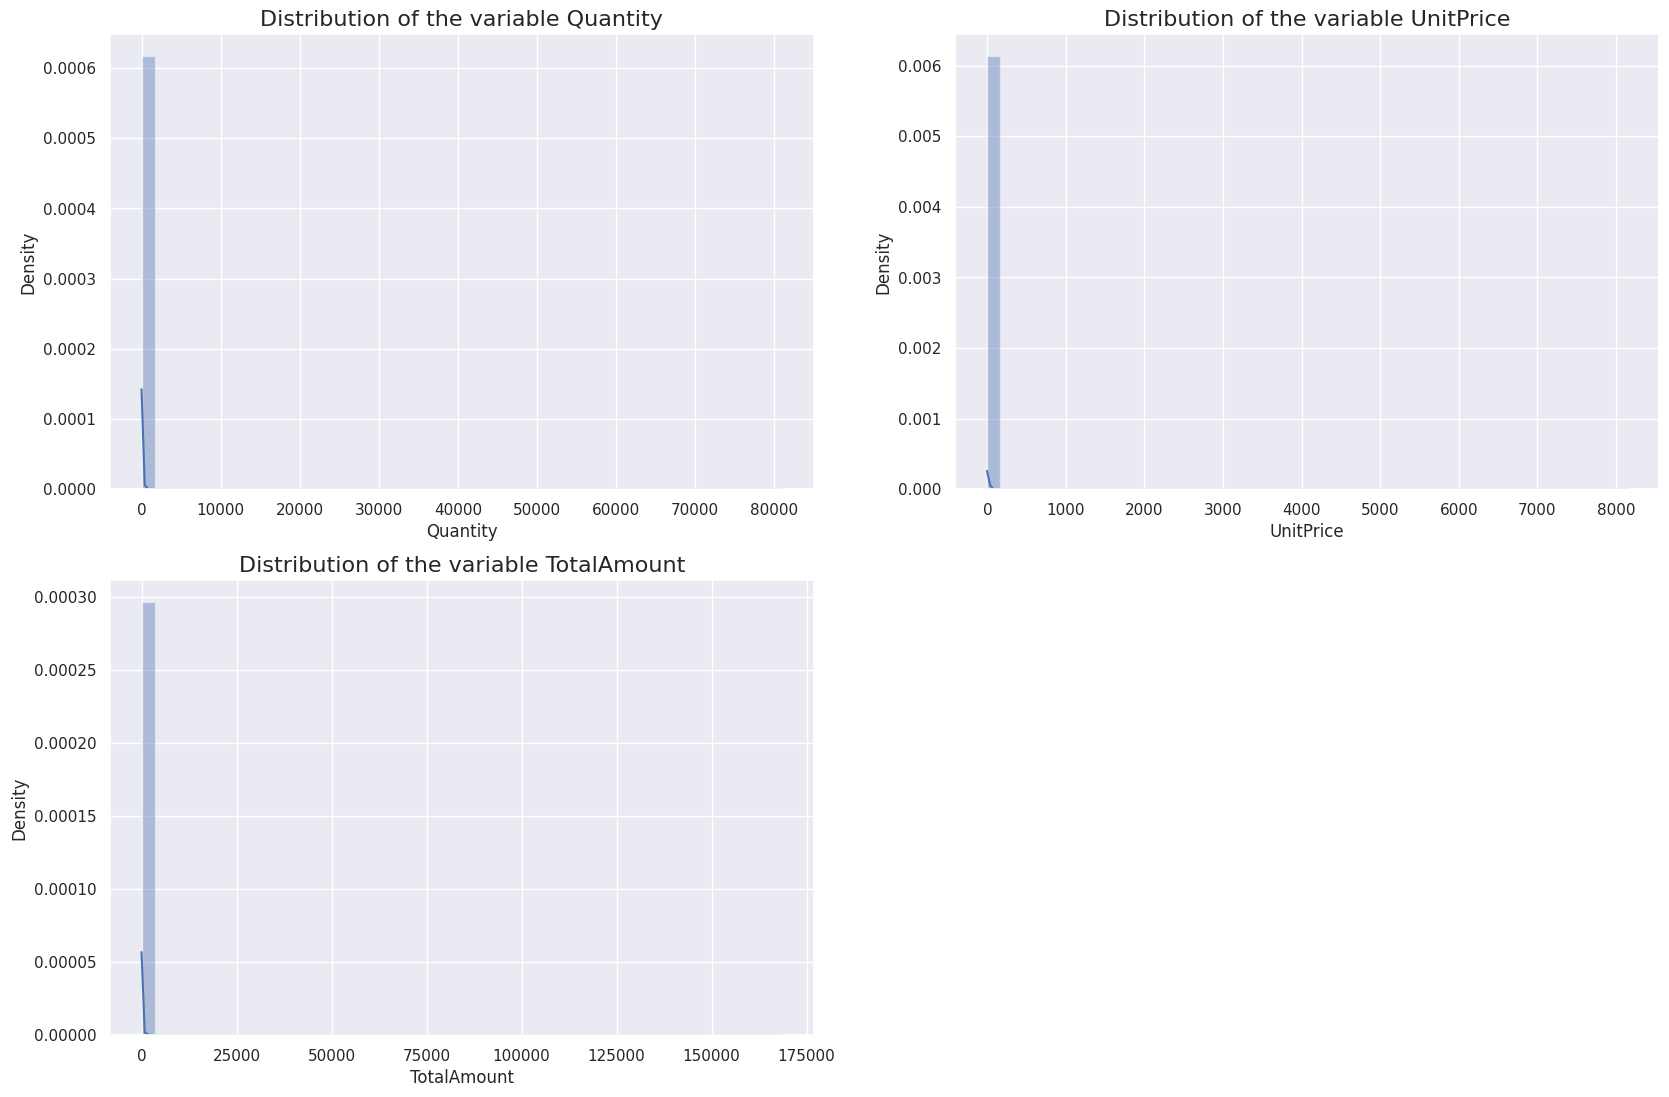

In [ ]:
# distribution of the numerical features
num_features = ['Quantity', 'UnitPrice', 'TotalAmount']
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

The distribution of all the variables are heavily right skewed.

We will apply log transformation on these variables to make it less skewed.

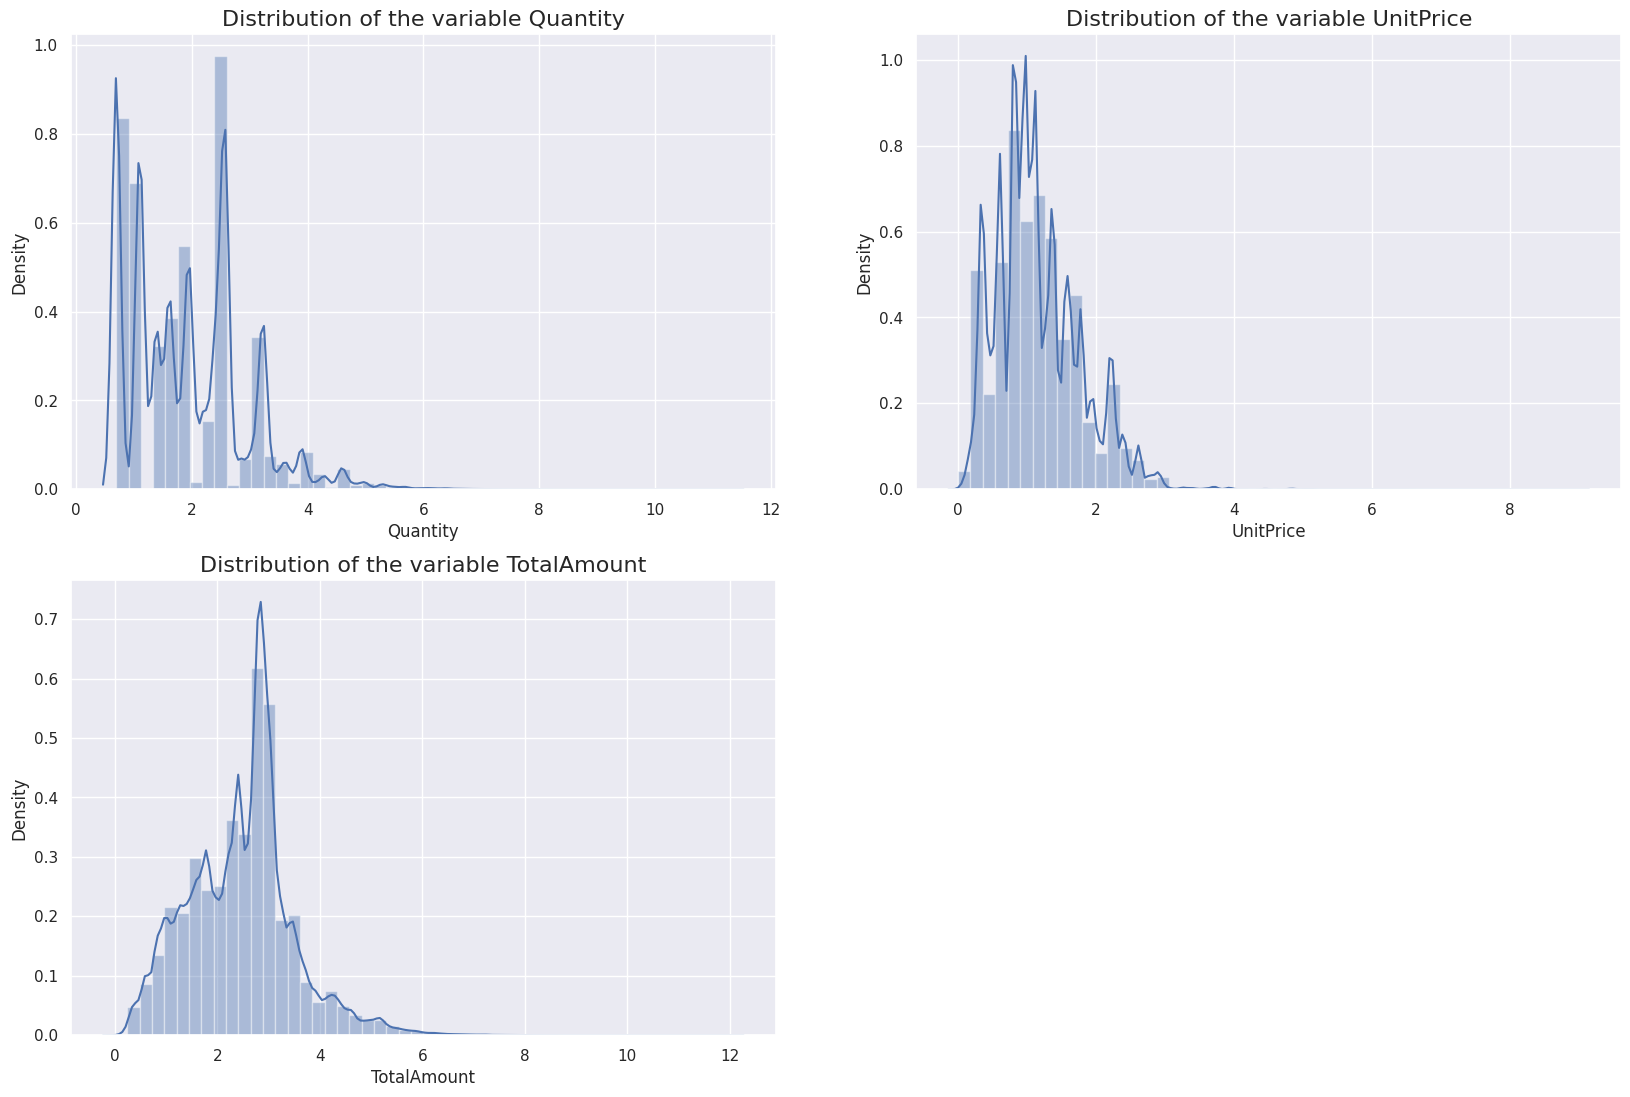

In [ ]:
# taking a log transformation
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(np.log1p(df[feature]))
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

The variables after log transformation are less skewed than before.

It isn't a normal distribution but somewhat close to that than before.

In [ ]:
# number of purchases w.r.t the day of the week
day_df = df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

,Day Name,Count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


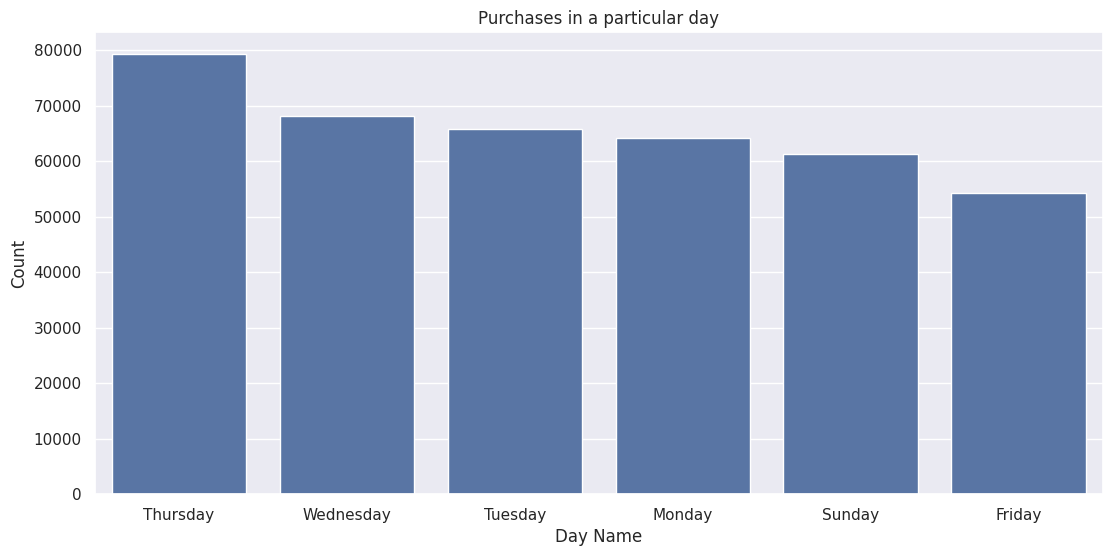

In [ ]:
# plot the number of purchases w.r.t day of the week
plt.subplots(figsize=(13,6))
sns.barplot(x='Day Name', y='Count', data=day_df)
plt.title('Purchases in a particular day')
plt.show()

Most of the customers have made a purchase in Thursday followed by Wednesday.

Friday is the day with least number of purchases made.

In [ ]:
# number of purchases w.r.t month
month_df = df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

,Month Name,Count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


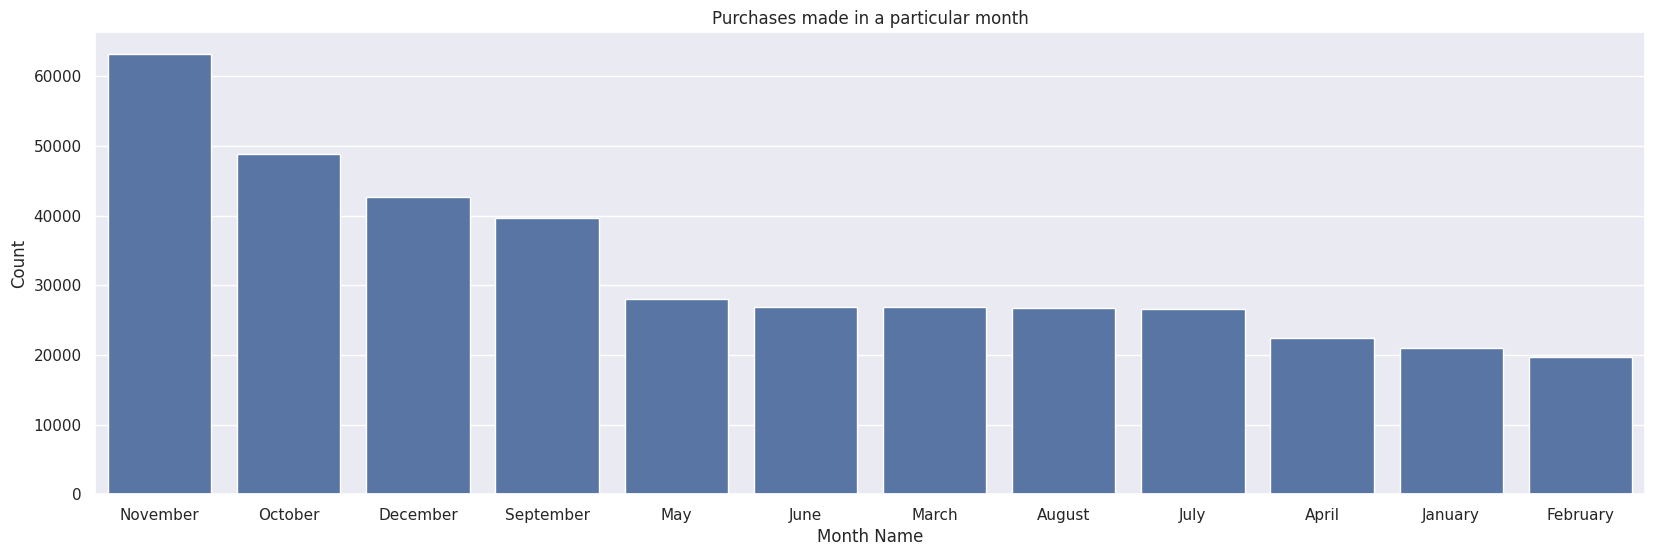

In [ ]:
# plot the number of purchases w.r.t month
plt.subplots(figsize=(20,6))
sns.barplot(x='Month Name', y='Count', data=month_df)
plt.title('Purchases made in a particular month')
plt.show()

The most number of purchases are made during October to December which is a festive season for many people.

The least number of purchases are made during the initial months of a year, January and February which is quite obvious because as soon as the festive season ends, purchases or sales will go down.

In [ ]:
# number of purchases w.r.t hour of the day
hour_df = df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

,Hour Name,Count
0,12,70938
1,13,63019
2,14,53251
3,11,48365
4,15,44790
5,10,37773
6,16,23715
7,9,21927
8,17,12941
9,8,8687


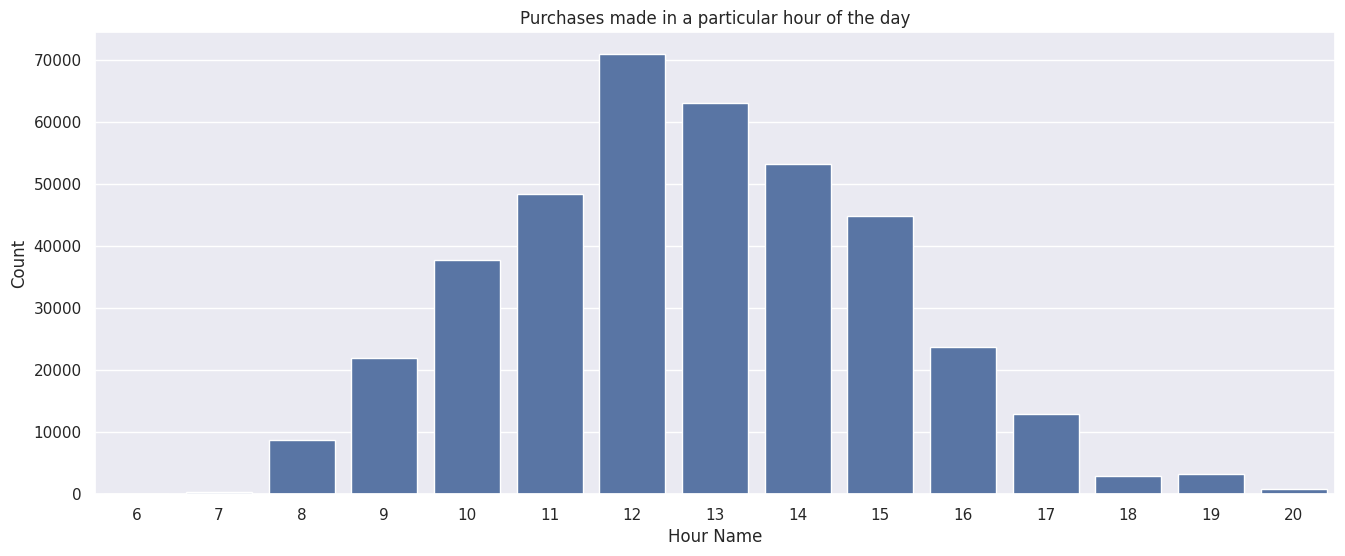

In [ ]:
# plot the number of purchases w.r.t hour of the day
plt.subplots(figsize=(16,6))
sns.barplot(x='Hour Name', y='Count', data=hour_df)
plt.title('Purchases made in a particular hour of the day')
plt.show()

Most of the purchases are around the afternoon period and a very few number of purchases during morning or evening.

We can bucket this hour graph into morning, afternoon and evening buckets.

In [ ]:
# group the time into 3 buckets
def time_day(time):
  if (time >= 6 and time <= 11):
    return 'Morning'
  elif (time >= 12 and time <= 17):
    return 'Afternoon'
  else:
    return 'Evening'

# apply the function into the column
df['time_day'] = df['hour'].apply(time_day)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,TotalAmount,Day,Month,time_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,15.30,Wednesday,December,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,20.34,Wednesday,December,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,22.00,Wednesday,December,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,20.34,Wednesday,December,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,20.34,Wednesday,December,Morning


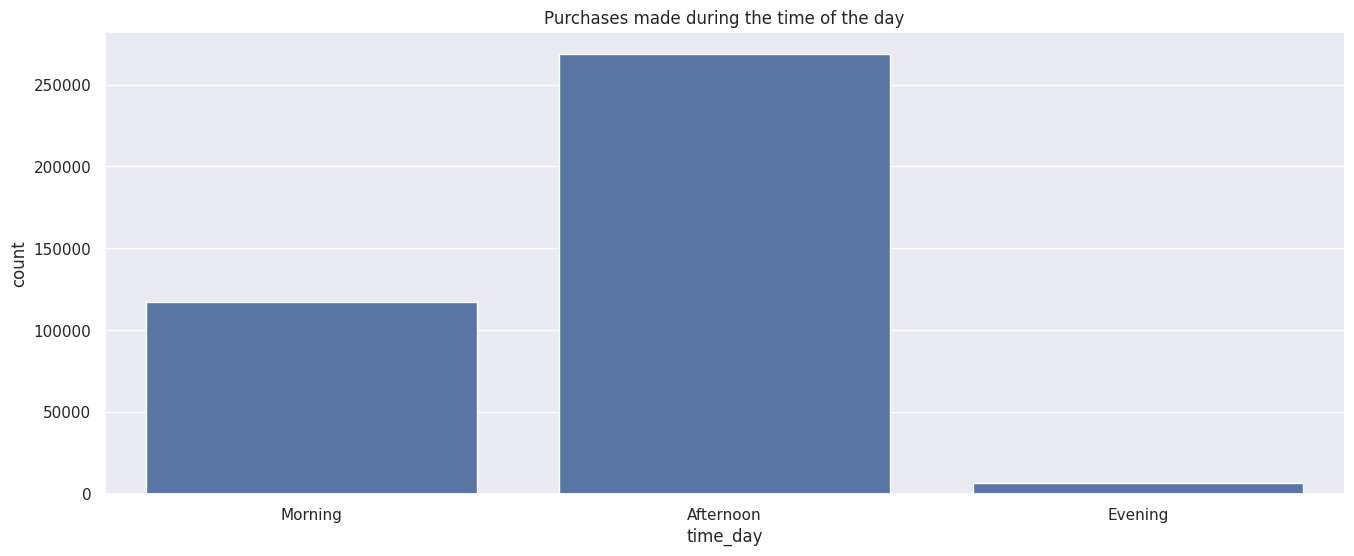

In [ ]:
# plot the number of purchases w.r.t hour again
plt.subplots(figsize=(16,6))
sns.countplot(x='time_day', data=df)
plt.title('Purchases made during the time of the day')
plt.show()

Now, it is more clear that most of the purchases has occurred during the Afternoon followed by Morning and the least number of purchases during Evening.

##  **RFM Model (Recency, Frequency and Monetary):**

Being a UK based retail store and as most of the customers or a huge chunk of customers are from UK, we have decided to consider the UK based customers only for segmentation.

In [ ]:
# filter UK data only
cust_df = df[df['Country'] == 'United Kingdom']

# print the shape of the data
cust_df.shape

(349203, 17)

###**Calculating RFM Scores:**

In [ ]:
# calculating RFM scores
# set latest date to '2011-12-10' as the last invoice date was '2011-12-09'
latest_date = dt.datetime(2011,12,10)

# create rfm modeling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days, 'InvoiceNo': lambda x: len(x),
                                            'TotalAmount': lambda x: x.sum()})

# convert invoice date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# rename columns to frequency, recency, monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [ ]:
# descriptive stats of the rfm dataframe
rfm_df.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.059474,90.523744,2048.688081
std,100.012264,225.506968,8985.230220
min,0.000000,1.000000,3.750000
25%,17.000000,17.000000,306.482500
50%,50.000000,41.000000,668.570000
75%,141.750000,98.000000,1660.597500
max,373.000000,7676.000000,280206.020000


**Let us plot the distribution of Recency, Frequency and Monetary Value:**

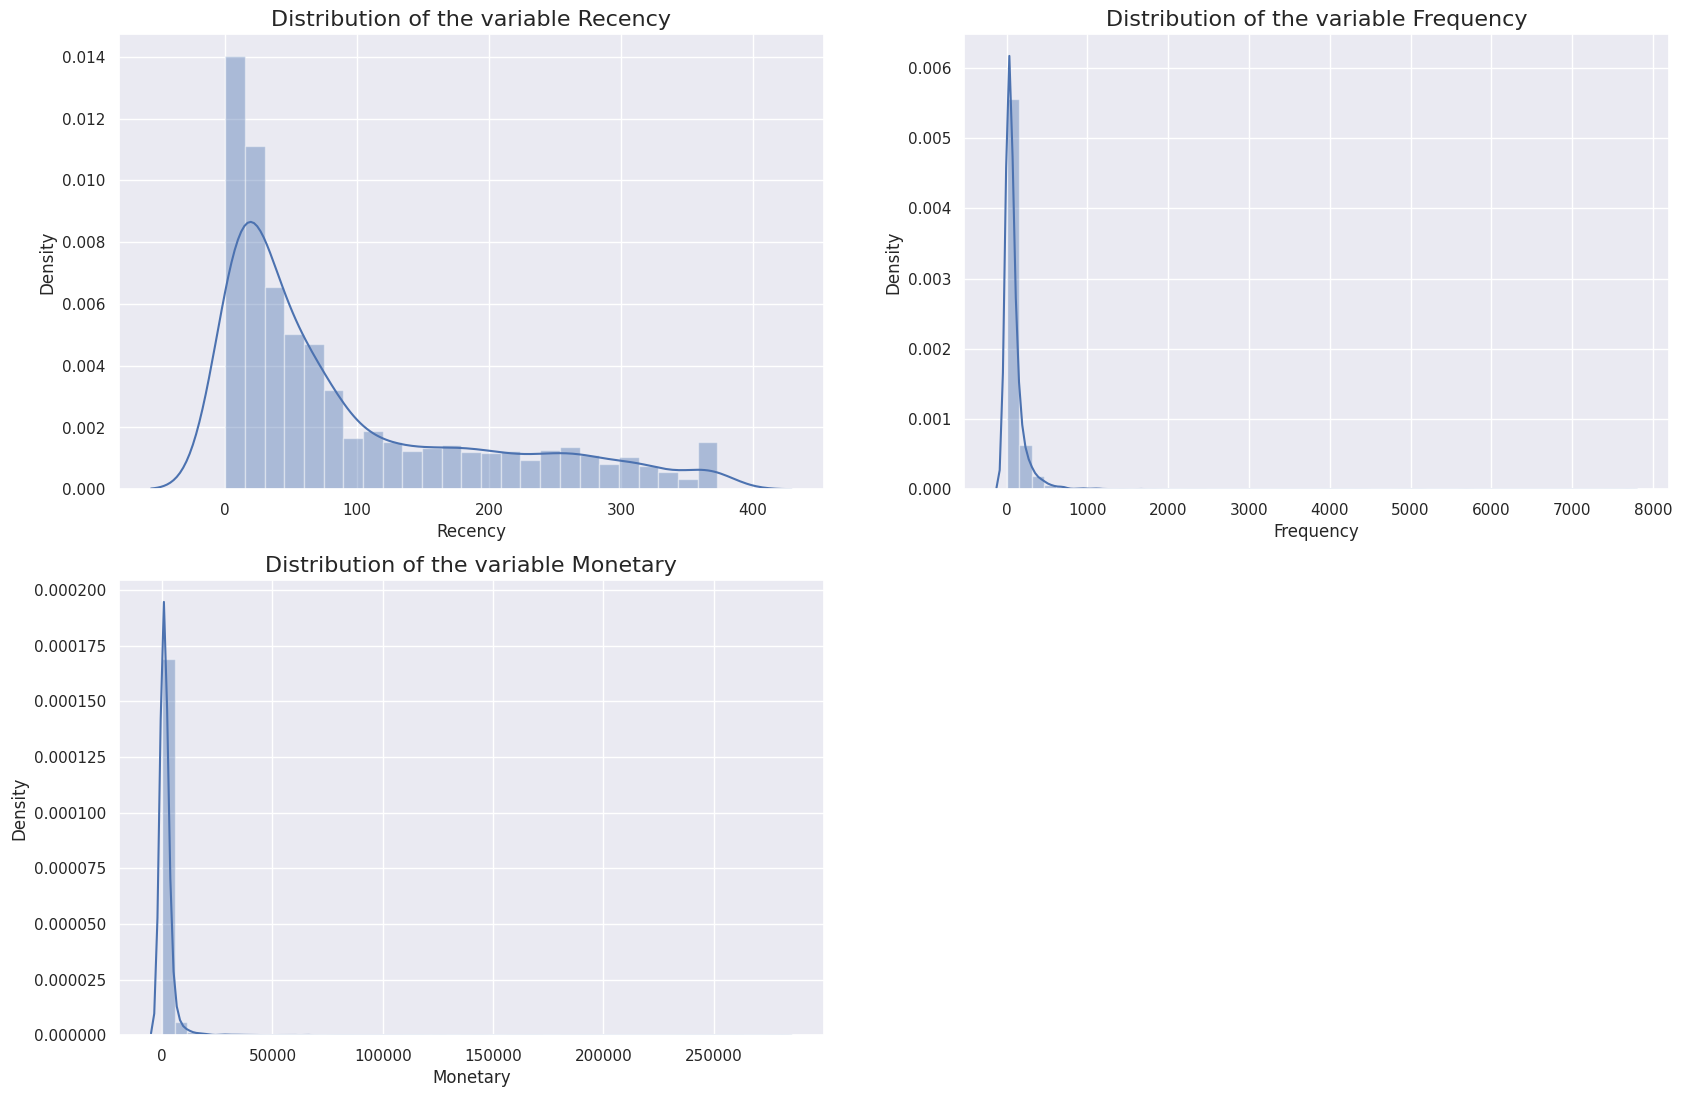

In [ ]:
# plot the distribution of the RFM values
count = 1
plt.subplots(figsize=(20,13))
for feature in rfm_df:
  plt.subplot(2,2,count)
  sns.distplot(rfm_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

###Applying log transformation to the RFM values and plot each distribution:

In [ ]:
# treat the negative and zero values to handle infinite numbers during log transformation
def handle_negative(num):
  if num <= 0:
    return 1
  else:
    return num

# apply the function to recency and monetary columns
rfm_df['Recency'] = [handle_negative(x) for x in rfm_df['Recency']]
rfm_df['Monetary'] = [handle_negative(x) for x in rfm_df['Monetary']]

# apply log transfomation to RFM values
log_df = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

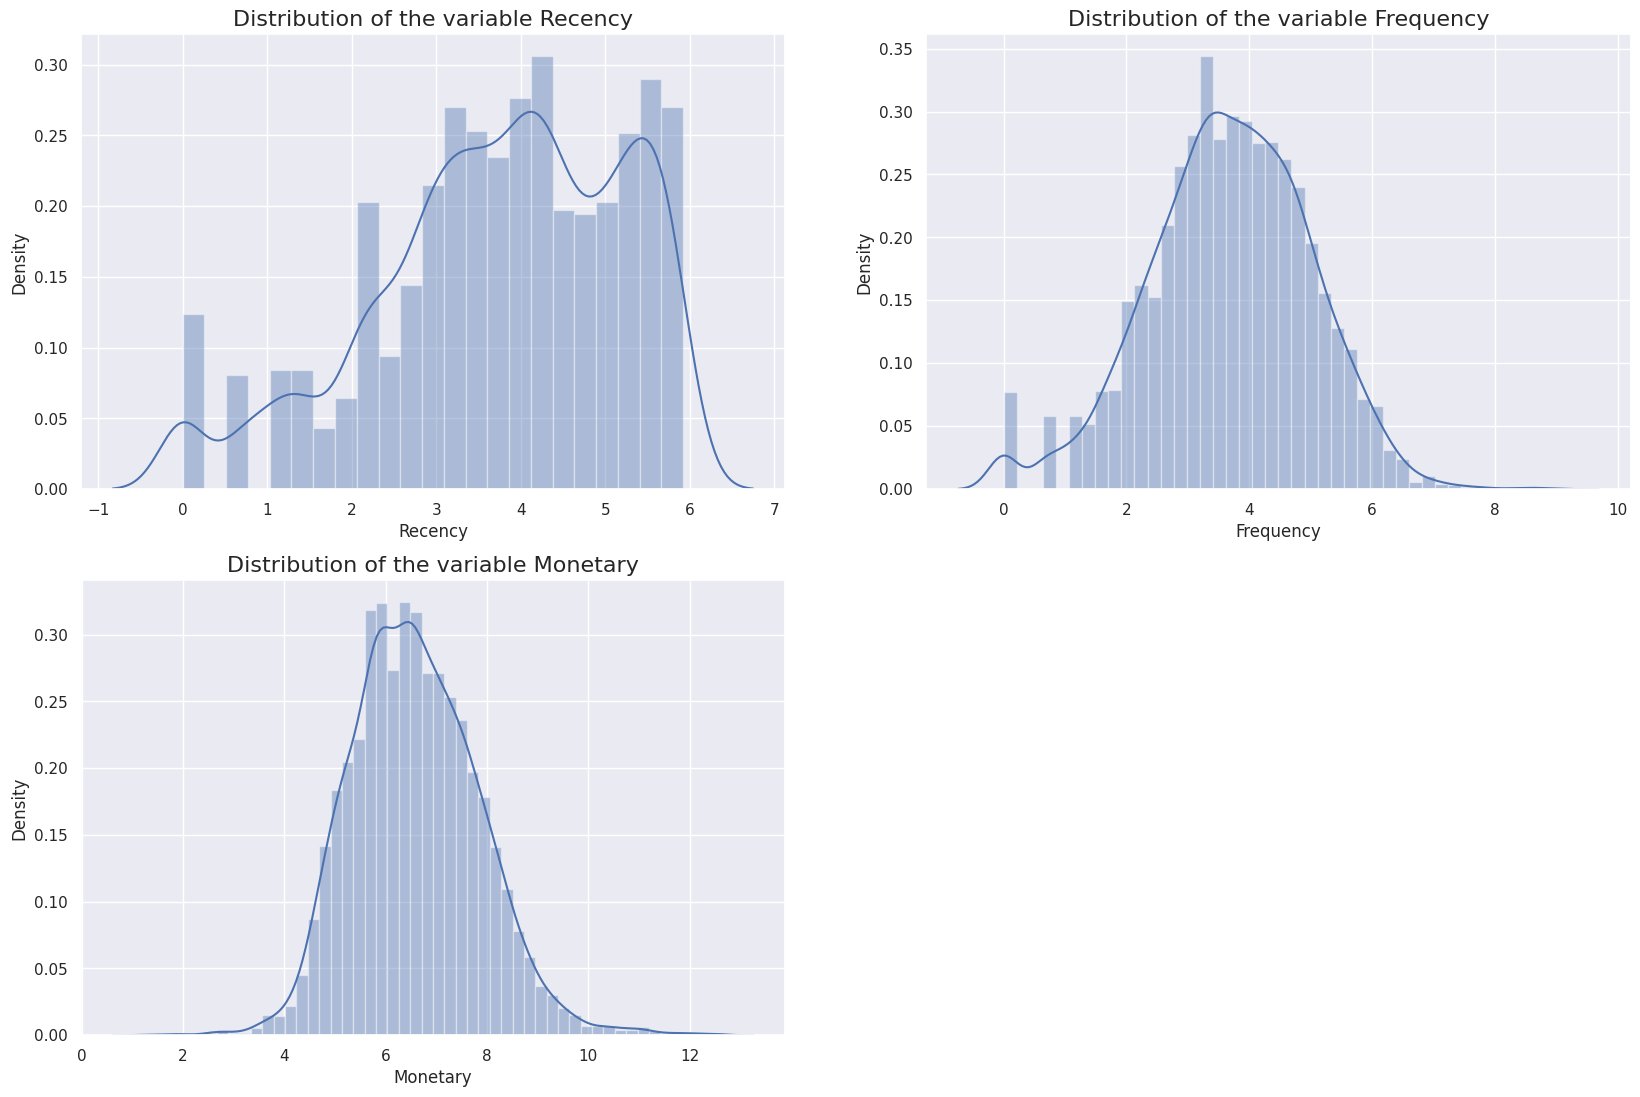

In [ ]:
# plot the log transformed distribution
count = 1
plt.subplots(figsize=(20,13))
for feature in log_df:
  plt.subplot(2,2,count)
  sns.distplot(log_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

The distribution of Recency, Frequency and Monetary values almost looks normal now.

In [ ]:
# apply log transformation on the original rfm dataframe
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [ ]:
# display the rfm_df
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,
12346.0,325,1,77183.60,5.783825,0.000000,11.253942
12347.0,2,182,4310.00,0.693147,5.204007,8.368693
12348.0,75,31,1797.24,4.317488,3.433987,7.494007
12349.0,18,73,1757.55,2.890372,4.290459,7.471676
12350.0,310,17,334.40,5.736572,2.833213,5.812338


In [ ]:
features = ['Recency_log', 'Frequency_log', 'Monetary_log']

# scaling our data
X_features = rfm_df[features].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)

## **Implementing K-Means Clustering:**

###Applying Elbow method on Recency, Frequency and Monetary:

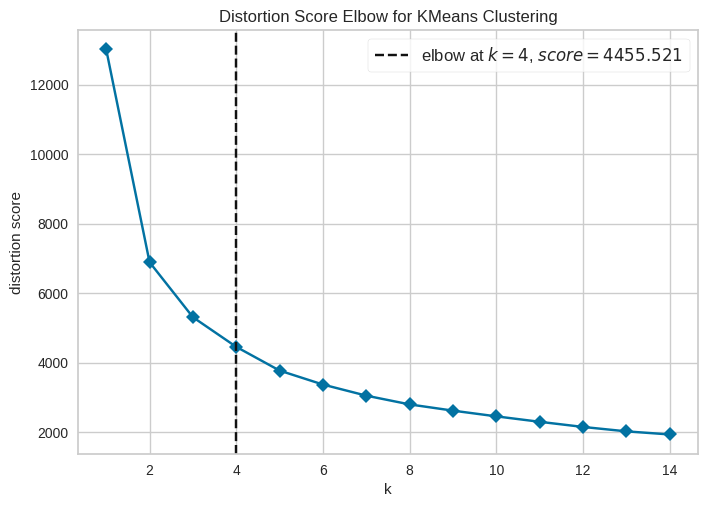

In [ ]:
# elbow method to find out the best k
from yellowbrick.cluster import KElbowVisualizer
SSE = {}
for k in range(1,15):
  km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
  km = km.fit(X)
  SSE[k] = km.inertia_

# plot the graph for SSE and number of clusters
visualizer = KElbowVisualizer(km, k=(1,15), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.poof()
plt.show()

From the elbow method we reach the conclusion that the optimal number of clusters is 3 for Recency, Frequency and Monetary values.

We will again run the model with number of clusters as 3.

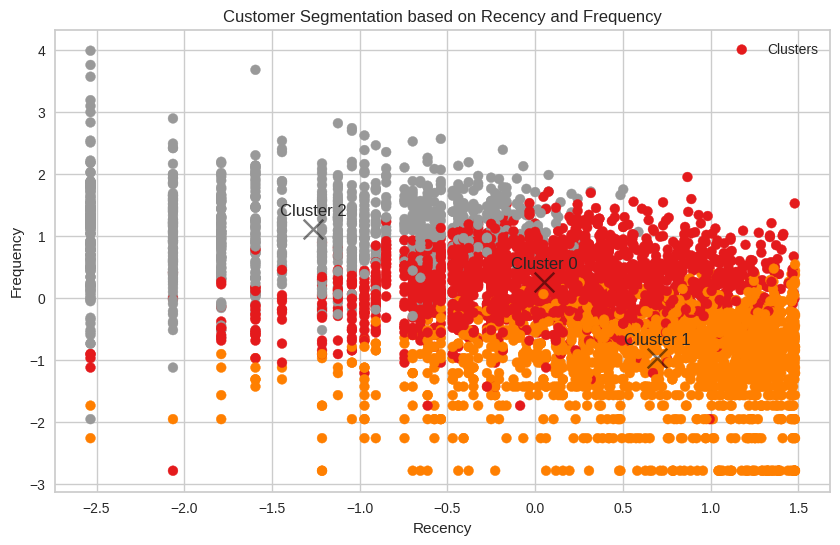

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X is your data array
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_km = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.title('Customer Segmentation based on Recency and Frequency')
plt.scatter(X[:,0], X[:,1], c=y_km, s=50, cmap='Set1', label='Clusters')

# Plot and annotate the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5, marker='x')
for i, center in enumerate(centers):
    plt.annotate(f'Cluster {i}', (center[0], center[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

We can observe three clusters from the KMeans model applied on Recency, Frequency and Monetary data.

###Interpreting the Clusters with the help of RFM Group:

Now, split the RFM values into four quantiles:

In [ ]:
# split the rfm values into four quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
# function to create R, F, M segments
def RScore(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def FnMScore(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [ ]:
# calculate RFM segment values for each record
rfm_df['R'] = rfm_df['Recency'].apply(RScore, args=('Recency', quantiles, ))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScore, args=('Frequency', quantiles, ))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScore, args=('Monetary', quantiles, ))
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M
0,12346.0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1
1,12347.0,2,182,4310.00,0.693147,5.204007,8.368693,1,1,1
2,12348.0,75,31,1797.24,4.317488,3.433987,7.494007,3,3,1
3,12349.0,18,73,1757.55,2.890372,4.290459,7.471676,2,2,1
4,12350.0,310,17,334.40,5.736572,2.833213,5.812338,4,4,3


**Calculate RFM Group and RFM Score from the RFM segmentation:**

In [ ]:
# add RFM group column
rfm_df['RFMGroup'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

# calculate RFM score from RFM group column
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis=1)
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore
0,12346.0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1,441,9
1,12347.0,2,182,4310.00,0.693147,5.204007,8.368693,1,1,1,111,3
2,12348.0,75,31,1797.24,4.317488,3.433987,7.494007,3,3,1,331,7
3,12349.0,18,73,1757.55,2.890372,4.290459,7.471676,2,2,1,221,5
4,12350.0,310,17,334.40,5.736572,2.833213,5.812338,4,4,3,443,11


In [ ]:
# find the clusters for the observations in the dataset
rfm_df['Cluster'] = kmeans.labels_
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore,Cluster
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1,441,9,0
12347.0,2,182,4310.00,0.693147,5.204007,8.368693,1,1,1,111,3,2
12348.0,75,31,1797.24,4.317488,3.433987,7.494007,3,3,1,331,7,0
12349.0,18,73,1757.55,2.890372,4.290459,7.471676,2,2,1,221,5,0
12350.0,310,17,334.40,5.736572,2.833213,5.812338,4,4,3,443,11,1


In [ ]:
# Group by cluster label and calculate mean
cluster_averages = rfm_df.groupby('Cluster').mean()
cluster_averages

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMScore
Cluster,,,,,,,,,,
0,69.434569,68.380589,1230.933104,3.811218,4.007021,6.802382,2.449836,2.179935,2.216467,6.846238
1,166.669643,15.109694,294.544937,4.763455,2.397585,5.433243,3.300383,3.628827,3.577168,10.506378
2,11.440171,260.245726,6589.563162,1.872663,5.148262,8.091764,1.230769,1.291667,1.251068,3.773504


#Conclusion and Recommendations

In conclusion, our analysis of the online retail dataset has provided valuable insights into customer behavior and purchasing trends. We found that the dataset contains 541909 records and 8 columns, including 'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', and 'Country'. Our exploratory data analysis revealed several interesting patterns and observations.

First, we observed that the distribution of 'Quantity' and 'UnitPrice' is right-skewed, indicating that a significant number of transactions involve small quantities or low unit prices. However, there are also a few high-value transactions, suggesting the presence of both retail and wholesale customers.

Visualizations such as histograms and scatter plots allowed us to identify correlations between certain attributes, helping us better understand the relationships within the data. We also detected outliers, some of which may require further investigation to ensure data integrity.

Our clustering analysis revealed 3 distinct customer segments based on their purchasing behavior. These segments provide valuable insights for targeted marketing and customer engagement.

**Overall Strategy:**

Cluster 0 ('At-Risk/Lapsed'): Focus on re-engagement strategies. Understand their needs and reasons for not returning. Offer incentives or feedback surveys to encourage them to revisit and make purchases.
Cluster 1 ('Champions/Loyal'): Prioritize maintaining their high level of engagement. Offer exclusive deals, loyalty programs, and early access to new products. They can also be engaged in referral programs.
Cluster 2 ('Potential Loyalists/Promising'): Encourage them to visit and buy more often. Personalized communication, recommending products based on past purchases, and loyalty rewards can be effective.

**In terms of recommendations, we suggest the following:**

Implement marketing strategies to retain and upsell high-value customers. Monitor and manage inventory effectively, especially for popular products. Consider international market entry strategies in countries with growing customer bases.

In summary, our analysis of the online retail dataset provides valuable insights for the company's business strategies. By understanding customer segments and behavior, the company can optimize its marketing, sales, and inventory management efforts to drive growth and profitability.

